# Simple Linear Model

ถ้าลองนึกภาพตามง่ายๆในมุมมองของผู้สร้างโมเดล เราอาจจะสร้างโมเดลที่มีความซับซ้อนมากๆและทำนายชุดข้อมูลที่เรามีได้ดีมาก หรืออาจจะสร้างโมเดลที่ซับซ้อนน้อยลงมาหน่อยแต่ก็ยังทำนายชุดข้อมูลที่เรามีได้ดีรองลงมาก็ได้ ตัวเลือกในการสร้างโมเดลมีหลากหลายรูปแบบ แต่ว่าเราจะเลือกโมเดลที่เหมาะสมได้อย่างไร?

ในบทเรียนนี้เราจะลองสร้างโมเดลทำนายชุดข้อมูลในรูปแบบต่าง ๆ และดูกันว่าโมเดลแบบใดจะเหมาะสมกับชุดข้อมูลตัวอย่างของเรา

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import ipywidgets as widgets  # ใช้สำหรับการทำ interactive display

ตัวอย่างการใส่ video ซึ่งจะมาปรับแก้ทีหลัง
<iframe width="560" height="315" src="https://www.youtube.com/embed/NCF1cqLCW84" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

โมเดลเชิงเส้น (Linear Model)
---
กำหนดให้สมการความสัมพันธ์ระหว่าง $x$ และ $y$ ที่แท้จริง เป็นสมการเชิงเส้น

$$y = w_0 + w_1x$$

โดยที่ $w_0$ คือค่าจุดตัดแกน $y$ และ $w_1$ คือค่าความชันของเส้นตรง

ในการเก็บข้อมูลจริงมักมีสัญญาณรบกวน (noise) ที่มาจากหลายปัจจัย เช่น ความไม่เสถียรของเครื่องมือเก็บข้อมูล คลื่นไฟฟ้ากระแสสลับที่ใช้ในประเทศ ในกรณีที่เก็บข้อมูลผ่านอุปกรณ์อิเล็กทรอนิคส์ หรืออาจจะมี noise ที่เราไม่รู้ว่ามาจากกระบวนการไหนก็ตาม ปัจจัยเหล่านี้ส่งผลให้ข้อมูลที่เก็บมานั้นมีค่าที่แตกต่างไปจากความสัมพันธ์ที่แท้จริง ซึ่งสามารถเขียนอธิบายได้ด้วยสมการ

$$y = w_0 + w_1x + noise$$

แทน

<br><br>
ในส่วนนี้เราจะลองทดลองเลียนแบบกระบวนการเก็บข้อมูลผ่านการเรียกใช้ `generate_sample_linear`


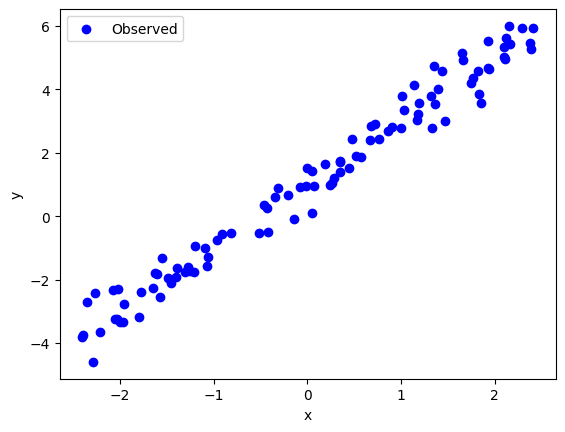

In [7]:
def generate_sample_linear(x, w0=1, w1=2, include_noise=True):

  # สร้างสมการเส้นตรงโดยที่จำลองการใส่สัญญาณรบกวนเข้าไป
  # เลือก include_noise เป็น True เพื่อกำหนดให้มีค่า noise เพิ่มเข้าไปในสมการ
  if include_noise:
    # สร้าง Gaussian noise
    noise = 0.20 * np.max(x) * np.random.randn(*x.shape)
  else:
    noise = 0
  y = w0 + (w1 * x) + noise
  return y

# ทดลองสร้างข้อมูลโดยการเรียกใช้ generate_sample_linear
num_samples = 100
w0_true, w1_true = 1, 2 # กำหนดค่า w0 และ w1 ที่แท้จริง สำหรับสร้างข้อมูล
x = 5 * np.random.rand(num_samples, 1) - 2.5 # สุ่มค่า x จากพิสัย -2.5 ถึง 2.5
y = generate_sample_linear(x, w0_true, w1_true, include_noise=True)

# สร้างข้อมูลที่ไม่มีสัญญาณรบกวนมาเปรียบเทียบ ซึ่งเป็นข้อมูลที่เรามักไม่มีโอกาสเข้าถึงในชีวิตจริง (จะใช้ในภายหลัง)
y_true = generate_sample_linear(x, w0_true, w1_true, include_noise=False)

# สร้างข้อมูลที่ไม่มีสัญญาณรบกวนมาแบบละเอียดสำหรับค่า x จำนวนมาก เพื่อใช้ในการวาดกราฟ (เส้นประสีดำ)
x_whole_line = np.linspace(-2.5, 2.5, 100)
y_true_whole_line = generate_sample_linear(x_whole_line, w0_true, w1_true, include_noise=False)

# Plot ข้อมูล x, y ที่มีอยู่
fig, ax = plt.subplots()
ax.scatter(x, y, c='b', label='Observed')
ax.plot(x_whole_line, y_true_whole_line, 'k--', label='True')
ax.set(xlabel='x', ylabel='y')
ax.legend()
plt.show()


กำหนดให้เรามีจำนวนจุดข้อมูลในรูปด้านบนทั้งหมด $n$ จุด $(x_1,y_1), (x_2,y_2), ..., (x_i,y_i),.., (x_n,y_n)$ แสดงด้วยสีน้ำเงิน หากเราพิจารณาภาพความสัมพันธ์ระหว่าง $x$ กับ $y$ จากการรันโค้ดด้านบน จะพบว่ามีลักษณะคล้ายกับเส้นตรง

**หมายเหตุ** ถึงแม้ว่าในรูปด้านบน เราจะ plot เส้นประสีดำ ซึ่งแสดงความสัมพันธ์ระหว่าง $x$ และ $y$ ที่แท้จริง (ปราศจากสัญญาณรบกวน) ได้ แต่ในชีวิตจริง เรามักจะไม่มีโอกาสเข้าถึงข้อมูลตรงนี้ได้เลย

<br><br>



สมมติว่ามีคนเดินมาถามเราว่า ถ้า $x$ มีค่าเป็น $0.8$ แล้ว $y$ ควรจะมีค่าเป็นเท่าไหร่ เราจะตอบเค้าว่าอย่างไรดี


ในการให้คำตอบตรงนี้ เราสามารถทำได้หลายวิธีมาก ๆ เช่น


*   ถ้าเกิดว่าเราไปไล่ดูจุดข้อมูลทั้ง $n$ จุดในชุดข้อมูลของเรา พบว่ามีจุด $(0.8, 2.6)$ อยู่ เราก็อาจจะตอบได้ว่า $y$ น่าจะมีค่าเป็น $2.6$

*   ถ้าเกิดว่าเราไปไล่ดูจุดข้อมูลทั้ง $n$ จุดในชุดข้อมูลของเรา แต่ไม่พบจุดที่มีค่า $x$ เป็น $0.8$ เลย แต่ดันมีจุด $(0.7, 2.4)$ และ $(0.9, 2.8)$ เราก็อาจจะตอบว่าค่า $y$ ที่สอดคล้องกับค่า $x=0.8$ ซึ่งเป็นจุดกึ่งกลางระหว่าง $x=0.7$ และ $x=0.9$ น่าจะมีค่า $y$ เป็นจุดตรงกลางระหว่าง $2.4$ และ $2.8$ หรือว่ามีค่าเท่ากับ $\frac{2.4+2.8}{2}=2.6$ นั่นเอง

หากสังเกตตัวอย่างด้านบนทั้ง 2 ตัวอย่าง เราจะเห็นว่าทุกครั้งที่เราจะตอบค่า $y$ เราจะต้องไปไล่ดูจุดข้อมูลในชุดข้อมูลของเรา สมมติว่า $n=1,000,000$ ล่ะ เราจะทำอย่างไรกันดี เราพอจะมีวิธีอะไรบางอย่างที่ช่วยให้เราสามารถตอบค่า $y$ ที่เหมาะสมจากค่า $x$ ใด ๆ ก็ตามได้อย่างรวดเร็วหรือไม่

---

เนื่องจากข้อมูลใน plot ด้านบน ดูมีลักษณะเป็นเส้นตรง เรามาทดลองใช้โมเดลที่เป็นสมการเชิงเส้น $\hat{y}=\hat{w_0} + \hat{w_1} x$ กันดีกว่า ซึ่งสมการนี้มี

* $\hat{w_0}$ เป็นค่าจุดตัดแกน $y$

* $\hat{w_1}$ เป็นค่าความชันของเส้นตรง

* $\hat{y}$ เป็นค่า $y$ ที่ทำนายมาจากสมการเส้นตรงของเรา สำหรับค่า $x$ ใด ๆ

ถ้าเกิดว่าเราสามารถหาค่า $\hat{w_0}$ และ $\hat{w_1}$ ที่เหมาะสมออกมาได้ (ซึ่งเราก็หวังว่ามันจะเป็นค่าเดียวกับ $w_0$ และ $w_1$ ของความสัมพันธ์จริง) เราจะสามารถทำนายค่า $y$ เป็น $\hat{w_0} + \hat{w_1} x$ จากค่า $x$ ใด ๆ ได้ทันที โดยที่ไม่ต้องไปนั่งไล่ดูจุดข้อมูลทั้ง $n$ จุดในชุดข้อมูลเลย

ใน code ด้านล่าง เรามาลองปรับค่า $\hat{w_0}$ และ $\hat{w_1}$ กัน เพื่อหาดูว่าค่าที่เหมาะสมมีค่าเป็นเท่าไหร่


In [3]:
# ใส่แถบสำหรับปรับค่า w1_hat และ w2_hat รวมถึงช่องสำหรับให้เลือกว่าจะโขว์เส้นความสัมพันธ์ระหว่าง x และ y ที่แท้จริงหรือไม่
@widgets.interact(w0_hat=widgets.FloatSlider(0.0, min=-4, max=4),
                  w1_hat=widgets.FloatSlider(0.0, min=-4, max=4),
                  show_true_line=widgets.Checkbox(False, description='Show true data'))
def plot_linear_results(w0_hat, w1_hat, show_true_line):

    # คำนวณค่า y จากค่า w0_hat และ w1_hat ที่เราเดามา โดยจะคำนวณมาเฉพาะอันที่มีค่า x ตรงกับที่มีในชุดข้อมูล
    y_predicted_partial = w0_hat + w1_hat * x

    # คำนวณค่า y จากค่า w0_hat และ w1_hat ที่เราเดามา สำหรับค่า x จำนวนมาก
    y_predicted = w0_hat + w1_hat * x_whole_line

    # สร้าง figure
    fig, ax = plt.subplots(figsize=(4,4))

    # Plot ข้อมูล x, y ที่มีอยู่ด้วยสีน้ำเงิน
    ax.scatter(x, y, c='b', label='Observed')

    # Plot ข้อมูลค่า y ที่เราทำนายมาที่ตำแหน่งค่า x ต่าง ๆ กัน ด้วยสีแดง
    ax.plot(x_whole_line, y_predicted, c='r', label='Predicted')

    # Plot ข้อมูลที่ไม่มี noise ด้วยสีดำ ซึ่งในความเป็นจริง เรามักไม่มีโอกาสเข้าถึงข้อมูลตรงนี้
    if show_true_line:
        ax.plot(x_whole_line, y_true_whole_line, 'k--', label='True')

    ax.set(xlabel='x', ylabel='y')
    ax.legend()
    plt.show()

interactive(children=(FloatSlider(value=0.0, description='w0_hat', max=4.0, min=-4.0), FloatSlider(value=0.0, …

จะเห็นได้ว่าเราสามารถลองปรับค่าความชันและจุดตัดแกน $y$ ของเส้นตรงไปเรื่อย ๆ จนมีความสอดคล้องกับชุดข้อมูลที่เราเก็บมา (สีน้ำเงิน)

หากเรากำหนดให้ค่า $\hat{w_0}=1$ และ $\hat{w_1}=2$ จะพบว่าเส้นตรงสีแดงมีความสอดคล้องกับจุดสีน้ำเงินค่อนข้างดี โดยเส้นตรงนั้นมีสมการคือ $y = 2x + 1$ ซึ่งเป็นเส้นตรงที่มีความชันเป็น $2$ และมีจุดตัดแกน $y$ คือ $(0,1)$



อีกวิธีหนึ่งที่อาจจะช่วยให้เราเลือกค่า $\hat{w_0}$ และ $\hat{w_0}$ ด้วยตาได้ง่ายขึ้น คือการ plot โชว์ความแตกต่างระหว่างจุดที่ observed มา (สีน้ำเงิน) และสิ่งที่โมเดลทำนายออกมา (สีแดง) ดังตัวอย่างโค้ดด้านล่าง โดยเราจะพยายามเลือกเอาค่า $\hat{w_0}$ และ $\hat{w_0}$ ที่ทำให้เส้นสีส้ม ๆ ในรูปมีขนาดรวมกันสั้นที่สุด


In [4]:
# เหมือน cell ก่อนหน้า แต่เพิ่มช่องสำหรับเลือกว่าจะโชว์ residual หรือไม่
@widgets.interact(w0_hat=widgets.FloatSlider(0.0, min=-4, max=4),
                  w1_hat=widgets.FloatSlider(0.0, min=-4, max=4),
                  show_true_line=widgets.Checkbox(False, description='Show true data'),
                  show_residual=widgets.Checkbox(True, description='Show residual'))
def plot_linear_results(w0_hat, w1_hat, show_true_line, show_residual):

    # คำนวณค่า y จากค่า w0_hat และ w1_hat ที่เราเดามา สำหรับค่า x จำนวนมาก
    y_predicted = w0_hat + w1_hat * x_whole_line

    # สร้าง figure
    fig, ax = plt.subplots(figsize=(4,4))

    # Plot ข้อมูล x, y ที่มีอยู่ด้วยสีน้ำเงิน
    ax.scatter(x, y, c='b', label='Observed')

    # Plot ข้อมูลค่า y ที่เราทำนายมาที่ตำแหน่งค่า x ต่าง ๆ กัน ด้วยสีแดง
    ax.plot(x_whole_line, y_predicted, c='r', label='Predicted')

    # Plot ข้อมูลที่ไม่มี noise ด้วยสีดำ ซึ่งในความเป็นจริง เรามักไม่มีโอกาสเข้าถึงข้อมูลตรงนี้
    if show_true_line:
        ax.plot(x_whole_line, y_true_whole_line, 'k--', label='True')

    # Plot ความแตกต่างระหว่างค่า y ที่ observed มา และค่า y ที่ทำนายมาด้วยสีส้ม
    if show_residual:

        # คำนวณค่า y จากค่า w0_hat และ w1_hat ที่เราเดามา โดยจะคำนวณมาเฉพาะอันที่มีค่า x ตรงกับที่มีในชุดข้อมูล
        y_predicted_partial = w0_hat + w1_hat * x

        ymin = np.minimum(y, y_predicted_partial)
        ymax = np.maximum(y, y_predicted_partial)
        ax.vlines(x, ymin, ymax, 'darkorange', alpha=0.3, label='Residuals')

    ax.set(xlabel='x', ylabel='y')
    ax.legend()
    plt.show()

interactive(children=(FloatSlider(value=0.0, description='w0_hat', max=4.0, min=-4.0), FloatSlider(value=0.0, …

ที่ผ่านมาเราเลือกค่า $\hat{w_0}$ และ $\hat{w_0}$ โดยการดูด้วยตาว่าเส้นตรงสีแดงที่เกิดขึ้นมานั้น ดูสอดคล้องกับจุดข้อมูลสีน้ำเงินมากน้อยแค่ไหน ซึ่งนับว่าเป็นจากวัดความเหมือนหรือความแตกต่างเชิงคุณภาพ (qualitative)

ในลำดับถัดไป เราจะมาลองดูวิธีการวัดความเหมือนหรือความแตกต่างเชิงปริมาณกันบ้าง (quantitative)

เรามาลองใช้ฟังก์ชัน $L(y_{i},\hat{y_i})$ สำหรับวัดความต่างระหว่าง $y_{i}$ และ $\hat{y_i}$ ออกมาเป็นตัวเลข 1 ตัว โดยการนำเอาค่าทั้งสองมาลบกันแล้วยกกำลังสอง

$$L(y_{i},\hat{y_i}) = (y_{i} - \hat{y_i})^2$$

*   ถ้าหากเราพยายามนำเอาสมการนี้ไปตีความทางเรขาคณิต เราจะเห็นว่าค่า $y_{i} - \hat{y_i}$ แสดงถึง"ความยาว"ของเส้นสีส้มแต่ละเส้นในโค้ดของ cell ก่อนหน้า (อาจะมีค่าเป็นลบหรือบวกก็ได้) ซึ่งแปลว่าค่า $L(y_{i},\hat{y_i})$ นี้ ก็คือค่าความยาวของเส้นสีส้มยกกำลังสองนั่นเอง
*   ถ้า $L(y_{i},\hat{y_i})$ มีค่าน้อย แสดงว่า $y_{i}$ กับ $\hat{y_i}$ มีความแตกต่างกันน้อย (เส้นสีส้มจะสั้น)
*   ถ้า $L(y_{i},\hat{y_i})$ มีค่ามาก แสดงว่า $y_{i}$ และ $\hat{y_i}$ มีความแตกต่างกันมาก (เส้นสีส้มจะยาว)


ชุดข้อมูลของเรามีทั้งหมด $n$ จุด ซึ่งหากเราต้องการวัดความแตกต่างในระดับชุดข้อมูล เราก็สามารถเอาค่า $L(y_{i},\hat{y_i})$ จากแต่ละจุดข้อมูลมาเฉลี่ยกันได้ เกิดเป็นสมการ

$$L(Y,\hat{Y}) =\frac{1}{n}\sum_{i=1}^{n}\left(y_{i}-\hat{y_i}\right)^{2}$$

ที่มีชื่อเรียกอีกว่า mean squared error (MSE) โดยในที่นี้เราใช้สัญลักษณ์

* $Y$ เพื่ออ้างอิงถึง $y_1, y_2, ..., y_i, ..., y_n$

* $\hat{Y}$ เพื่ออ้างอิงถึง $\hat{y_1}, \hat{y_2}, ..., \hat{y_i}, ..., \hat{y_n}$

หากเราย้อนกลับไปที่ตัวอย่างด้านบนที่เราพยายามปรับค่า $\hat{w_0} และ \hat{w_1}$ (จุดตัดแกน $y$ และค่าความชัน ตามลำดับ) แทนที่เราจะวัดผลด้วยตา เราสามารถลองใช้ $L$ สำหรับช่วยในการวัดผล โดยสุดท้ายแล้ว เราจะเลือกค่า $\hat{w_0} และ \hat{w_1}$ ที่ทำให้ $L$ มีค่าน้อยที่สุด

อย่างไรก็ตาม การทดลองสุ่มค่าไปเรื่อย ๆ ในลักษณะนี้ เป็นวิธีการที่ใช้เวลานานมาก และไม่ค่อยมีประสิทธิภาพ

<br><br>

หากเรามองออกว่าโจทย์ที่เราพยายามแก้อยู่ เป็นโจทย์การหาค่าต่ำสุดของฟังก์ชัน $L$ ซึ่งสามารถเขียนในทางคณิตศาสตร์ได้ว่า

$$
\min_{\hat{w_{0}},\hat{w_{1}}}L(Y,\hat{Y})
=\min_{\hat{w_{0}},\hat{w_{1}}}\frac{1}{n}\sum_{i=1}^{n}\left(y_{i}-\hat{y_i}\right)^{2}
= \min_{\hat{w_{0}},\hat{w_{1}}}\frac{1}{n}\sum_{i=1}^{n}\left(y_{i}-(\hat{w_{0}}+\hat{w_{1}}x_{i})\right)^{2}
$$

เราก็สามารถเอาเครื่องมือทางคณิตศาสตร์ (เช่น calculus, สถิติ และ linear algebra) มาแก้โจทย์ข้อนี้ได้ ซึ่งคำตอบที่ $\hat{w_{0}}$ และ $\hat{w_{1}}$ ที่ได้รับจากการแก้โจทย์ข้อนี้ ก็คือคำตอบที่ทำให้เส้นตรงของเรามีความแตกต่างจากข้อมูลที่เราเก็บมาน้อยที่สุดภายใต้มาตรวัดประเภทนี้ หรือพูดอีกอย่างว่ามีความเหมือนที่สุดนั่นเอง


**หมายเหตุ** เนื่องจาก $L$ ในที่นี้แสดงถึงความแตกต่าง ซึ่งเราต้องการหาคำตอบที่ทำให้มันมีค่าน้อย (ความสูญเสียน้อย) เรามักจะเรียก $L$ ในบริบทนี้ว่า loss function


---

เนื่องจากมีผู้เรียนจำนวนหนึ่งยังไม่มีโอกาสได้เรียนเนื้อหาทางคณิตศาสตร์ที่จำเป็นต่อการแก้โจทย์ข้อนี้ (เช่น การใช้ calculus และ linear algebra) เราจะแก้โจทย์ข้อนี้ผ่านการเรียกใช้ `LinearRegression` จากไลบรารี่ `scikit-learn` เลย

In [5]:
model_linear = LinearRegression()

# ให้โมเดลหาค่า w_0 and w_1 จากข้อมูล (x,y) ทั้งหมดที่มี
model_linear.fit(x, y)
w0_hat = model_linear.intercept_[0]
w1_hat = model_linear.coef_[0][0]

print(f"True slope {w1_true:0.2f}")
print(f"Estimated slope {w1_hat:0.2f}\n")
print(f"True intercept {w0_true:0.2f}")
print(f"Estimated intercept {w0_hat:0.2f}")

True slope 2.00
Estimated slope 2.01

True intercept 1.00
Estimated intercept 1.02


จะเห็นว่าความชันและจุดตัดแกน $y$ ที่ประมาณจากโมเดล linear regression มีค่าใกล้กับค่าที่เรากำหนดมาตอนสร้างชุดข้อมูล

หลังจากที่เรา fit โมเดลแล้ว (โมเดลได้ทำการประมาณค่า $\hat{w_0}$ และ $\hat{w_1}$ เรียบร้อยแล้ว) เราสามารถทำนายค่า $y$ จาก $x$ ใดๆ ได้จากสมการ $ \hat{y} = \hat{w_0} + \hat{w_1}x$ ได้โดยตรง หรือผ่านการเรียกใช้ฟังก์ชัน `predict` ได้เช่นกัน

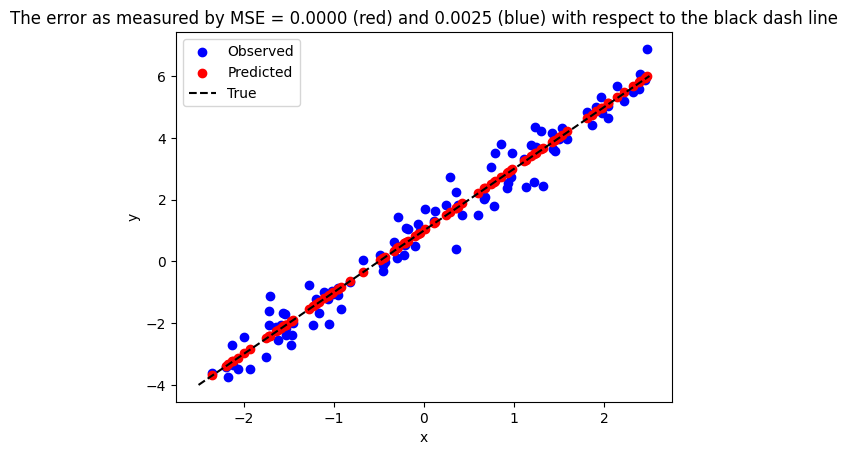

In [6]:
# ใช้โมเดลทำนายค่า y จากค่า x วิธีที่ 1
y_hat = w0_hat + w1_hat*x

# ใช้โมเดลทำนายค่า y จากค่า x วิธีที่ 2
# y_hat = model_linear.predict(x)

# วัด mean squared error จากการทำนาย
def mse(y,y_hat):
  return np.mean((y-y_hat)**2)/y.shape[0]

mse_val = mse(y_true, y_hat)
mse_val_noisy = mse(y_true, y)

# แสดงผลการทำนาย
fig, ax = plt.subplots()
ax.scatter(x, y, c='b', label='Observed')
ax.set(xlabel='x', ylabel='y')
ax.scatter(x, y_hat, c='r', label='Predicted')
ax.plot(x_whole_line, y_true_whole_line, 'k--', label='True')
ax.legend()
ax.set_title(f"The error as measured by MSE = {mse_val:0.4f} (red) and {mse_val_noisy:0.4f} (blue) with respect to the black dash line")
plt.show()

จากการสังเกตด้วยตา จะเห็นว่าค่า $y$ ที่โมเดลได้ทำนายออกมา (จุดสีแดง) มีความสอดคล้องกับความสัมพันธ์ระหว่าง $x$ และ $y$ ที่แท้จริง (เส้นประสีดำ) มากกว่าข้อมูลที่เราเก็บมาเสียอีก (จุดสีน้ำเงิน)

นอกจากนั้น เราก็ได้ใช้ loss function ตัวเดิม

$$MSE(Y,\hat{Y}) = L(Y,\hat{Y}) =\frac{1}{n}\sum_{i=1}^{n}\left(y_{i}-\hat{y_i}\right)^{2}$$

มาเป็นมาตรวัดความเหมือน/ความคล้ายระหว่างชุดข้อมูลเชิงปริมาณ และพบว่า MSE ระหว่างค่า $y$ ของจุดสีแดงกับค่า $y$ ที่มาจากความสัมพันธ์ที่แท้จริง (สีดำ) มีค่าต่ำกว่า MSE ระหว่างค่า $y$ ที่เราเก็บมาซึ่งมีสัญญาณรบกวน​ (สีน้ำเงิน) กับ ค่า $y$ ที่มาจากความสัมพันธ์ที่แท้จริง (สีดำ)

จะเห็นได้ว่าการเปรียบเทียบทั้งแบบเชิงคุณภาพและเชิงปริมาณมีความสอดคล้องกันในระดับหนึ่ง


<br><br>
MSE เป็นแค่หนึ่งในวิธีสำหรับวัดผล (evaluation metric) เท่านั้น ยังมีอีกหลายวิธีที่ใช้วัดผลออกมาเป็นตัวเลข เช่น mean absolution error (MAE), accuracy, F-score ฯลฯ ซึ่ง evaluation metric แต่ละอัน วัดค่าความเหมือนหรือความแตกต่างด้วยการใช้มาตรวัดคนละตัว ซึ่งมีเหมาะกับสถานการณ์ที่แตกต่างกัน

ใน module นี้ เราจะใช้ MSE เป็น evaluation metric ไปก่อน แต่ใน module ถัด ๆ ไป หรือการทำงานจริง เราจะได้เห็น evaluation metric ที่หลากหลายมากยิ่งขึ้น

ตอนนี้น่าจะเป็นเวลาที่ดีสำหรับผู้เรียนหลาย ๆ คนที่จะกลับไปทบทวนเนื้อหาเกี่ยวกับ evaluation metrics หลาย ๆ ประเภทจาก lecture ที่ชื่อว่า [Model Evaluation](https://youtu.be/xXW2mPt83Dc) ของภายใต้ Session 6: Data Modeling ของ Brain Building Blocks

<iframe width="560" height="315" src="https://www.youtube.com/embed/xXW2mPt83Dc" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>


---
เราลองกลับมาดูตัวอย่างที่คล้าย ๆ กับตัวอย่างที่พูดไว้ในช่วง Introduction ของ module นี้ ที่เราให้แมวดูภาพที่มีลักษณะต่าง ๆ กัน ในขณะที่เราใช้ electrode บันทึกการส่งสัญญาณของ neuron ใน visual cortex ของแมวตัวนั้น

หากเราลองเปลี่ยนแปลง contrast ของภาพที่ให้แมวดู (โดยใช้ orientation ที่ neuron ตัวนั้น sensitive ที่สุดเท่านั้น ไม่มีการเปลี่ยน orientation เลย) แล้วเก็บค่า average firing rate เอาไว้ เราสามารถลองศึกษาดูว่าการเปลี่ยน contrast ของภาพมันมีผลอย่างไรต่อ average firing rate ของ neuron ตัวนั้น

สมมติว่าเราลองเอาข้อมูลมา plot ดู แล้วพบข้อมูลที่หน้าตาเหมือน code ใน cell ถัดไป

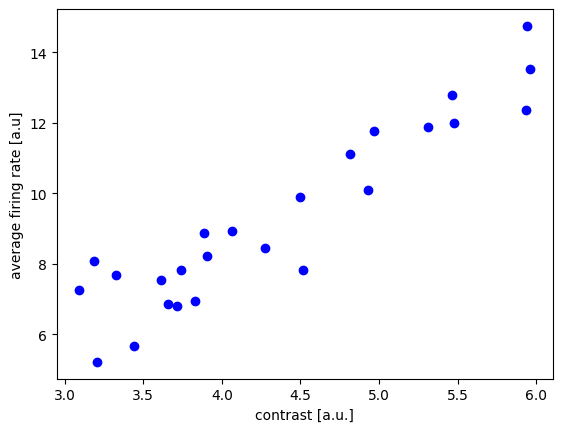

In [13]:
# ทดลองสร้างข้อมูลโดยการเรียกใช้ generate_sample_linear
num_samples = 25
w0_true, w1_true = 1, 2 # กำหนดค่า w0 และ w1 ที่แท้จริง สำหรับสร้างข้อมูล
x = 3 * np.random.rand(num_samples, 1) + 3
y = generate_sample_linear(x, w0_true, w1_true, include_noise=True)

# Plot ข้อมูล x, y ที่มีอยู่
fig, ax = plt.subplots()
ax.scatter(x, y, c='b')
ax.set(xlabel='contrast [a.u.]', ylabel='average firing rate [a.u]')
plt.show()

จากการดูหน้าตาของกราฟนี้ เราพบว่ามีลักษณะเป็นคล้ายเส้นตรง (อย่างน้อยก็ในช่วงค่า $x$ ระหว่าง $3$ กับ $6$)

ถ้าเราต้องการทำนายค่า average firing rate ของ neuron ตัวนี้จากค่า contrast ค่าใดค่าหนึ่งในช่วง $x$ ระหว่าง $3$ กับ $6$ วิธีหนึ่งที่เราได้เรียนจากเนื้อหาในบทเรียนนี้ก็คือการประมาณค่าความสัมพันธ์ระหว่าง average firing rate ของ neuron (แกน $y$) กับค่า contrast (แกน $x$) ด้วยสมการเส้นตรง $$ \hat{y} = \hat{w_0} + \hat{w_1} x$$

โดยสามารถหาค่า $\hat{w_0}$ และ $\hat{w_1}$ การเรียกใช้ `sklearn.linear_model.LinearRegression` ได้อย่างง่ายดาย

**ข้อควรระวัง**

ข้อมูลแสดงความสัมพันธ์ที่แท้จริงระหว่าง average firing rate กับ contrast มีความซับซ้อนกว่าตัวอย่างที่เราสร้างไว้ตรงนี้มาก เช่น หากเราดูค่า contrast ที่นอกเหนือจากช่วง $3 - 6$ เราอาจพบว่า

* ความสัมพันธ์เริ่มมีความโค้งงอ ไม่เป็นเส้นตรงอีกต่อไป
* เมื่อมีค่า contrast สูงถึงระดับหนึ่ง ค่า average firing rate ก็ไม่เพิ่มขึ้นแล้ว

ถ้าเราต้องการใช้โมเดลตัวเดียว เพื่ออธิบายความสัมพันธ์ทั้งหมดได้ เรามีความจำเป็นต้องพัฒนาโมเดลที่มีความซับซ้อนมากยิ่งขึ้น

หรืออีกวิธีหนึ่งก็คือการแบ่งแกน $x$ ออกเป็นช่วงต่าง ๆ แล้วเราใช้สมการต่างชนิดกัน อธิบายความสัมพันธ์ในแต่ละช่วง

Multiple Linear Regression
---


ทีนี้เรามาลองดูการทดลองที่เปลี่ยนไปเล็กน้อย

สมมติเราให้น้องแมวดูภาพที่มีการเปลี่ยนแปลง contrast แต่ไม่เปลี่ยน orientation เหมือนในตัวอย่างที่แล้ว **พร้อมกันกับ** การให้ฟังเสียงที่เรากำหนดความดังได้

แล้วเราไปวัด ค่า average firing rate จาก neuron ประเภท multi-sensory neuron ในขณะที่เราเปลี่ยน contrast ของภาพ และ ความดังของเสียง ไปเรื่อย ๆ เราสามารถเอาข้อมูลนี้มาศึกษาดูว่าการเปลี่ยน contrast และความดัง มีผลต่อ average firing rate ของ neuron ตัวนั้นอย่างไร

สมมติว่าเราลองเอาข้อมูล (contrast, loudness, average firing rate) มา plot ดู แล้วพบข้อมูลที่หน้าตาเหมือน code ใน cell ถัดไป

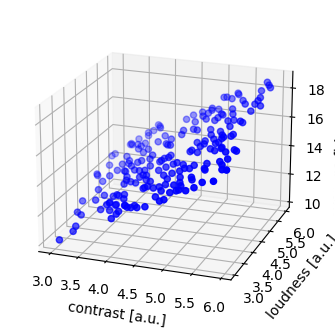

In [99]:
def generate_sample_multi_linear(x1, x2, w0=1, w1=2, w2=1, include_noise=True):

  # สร้างสมการเส้นตรงโดยที่จำลองการใส่สัญญาณรบกวนเข้าไป
  # เลือก include_noise เป็น True เพื่อกำหนดให้มีค่า noise เพิ่มเข้าไปในสมการ
  if include_noise:
    # สร้าง Gaussian noise
    noise = 0.1*np.random.randn(*x1.shape)
  else:
    noise = 0

  y = w0 + (w1 * x1) + (w2* x2) + noise

  return y


# ทดลองสร้างข้อมูลโดยการเรียกใช้ generate_sample_multi_linear
num_samples = 200
x1 = 3 + 3*np.random.rand(num_samples, 1)
x2 = 3 + 3*np.random.rand(num_samples, 1)
y = generate_sample_multi_linear(x1, x2)

# แสดงผลภาพ
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(projection='3d')
ax.scatter(x1, x2, y, c='b', marker='o')
ax.set_xlabel('contrast [a.u.]')
ax.set_ylabel('loudness [a.u.]')
ax.set_zlabel('average firing rate [a.u.]')
ax.view_init(elev=20, azim=-70)
plt.show()

หากเราสังเกตรูปด้านบน เราจะเห็นว่าข้อมูลมีลักษณะเป็นเหมือนแผ่นกระดาษสี่เหลี่ยมผืนผ้า

ในทางคณิตศาสตร์เราสามารถเขียนสมการของแผ่นกระดาษสี่เหลี่ยมผืนผ้าได้

$$ y = w_0 + w_1 x_1 + w_2 x_2 $$

โดยที่ $w_0$, $w_1$ และ $w_2$ เป็นตัวแปรที่เราปรับค่าได้ ซึ่งการปรับค่าตัวแปรเหล่านี้ จะส่งผลให้แผ่นกระดาษนี้ (เราเรียกมันว่า **plane**) มันหมุนไปมา หรือเลื่อนขึ้นลงได้

<br><br>
เราสามารถลองใช้สมการนี้ มาเปรียบเทียบกับข้อมูลของเราดู โดยการลองปรับค่า $w_0$, $w_1$ และ $w_2$ ไปเรื่อย ๆ ตาม code ใน cell ถัดมา

In [100]:
# ใส่แถบสำหรับปรับค่า w1_hat และ w2_hat รวมถึงช่องสำหรับให้เลือกว่าจะโขว์เส้นความสัมพันธ์ระหว่าง x และ y ที่แท้จริงหรือไม่
@widgets.interact(w0_hat=widgets.FloatSlider(0.0, min= 0.5, max=4),
                  w1_hat=widgets.FloatSlider(0.0, min=-1, max=4),
                  w2_hat=widgets.FloatSlider(0.0, min=-1, max=4))
def plot_plane_results(w0_hat, w1_hat, w2_hat):

    # สร้างข้อมูลที่ไม่มีสัญญาณรบกวนมาแบบละเอียดสำหรับค่า x1 และ x2 จำนวนมาก เพื่อใช้ในการวาด plane
    num_sample_per_axis = 100
    X1_whole_plane, X2_whole_plane = np.meshgrid(3 + 3*np.random.rand(num_sample_per_axis),
                                                 3 + 3*np.random.rand(num_sample_per_axis))

    x1_whole_plane = np.reshape(X1_whole_plane, (-1, 1))
    x2_whole_plane = np.reshape(X2_whole_plane, (-1, 1))

    # คำนวณค่า y จากค่า w0_hat และ w1_hat ที่เราเดามา สำหรับค่า x จำนวนมาก
    y_predicted_whole_plane = w0_hat + w1_hat * x1_whole_plane + w2_hat * x2_whole_plane

    # Plot รูปออกมา
    fig = plt.figure(figsize=(4,4))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(x1_whole_plane, x2_whole_plane, y_predicted_whole_plane, c='k', marker='.', label='Predicted', alpha=0.2)
    ax.scatter(x1, x2, y, c='b', marker='o')
    ax.set_xlabel('contrast [a.u.]')
    ax.set_ylabel('loudness [a.u.]')
    ax.set_zlabel('average firing rate [a.u.]')
    ax.view_init(elev=20, azim=-70)
    plt.show()

interactive(children=(FloatSlider(value=0.5, description='w0_hat', max=4.0, min=0.5), FloatSlider(value=0.0, d…

การลองปรับค่า $w_0$, $w_1$ และ $w_2$ ไปเรื่อย ๆ เราน่าจะพอเห็นภาพแล้วว่าตัวแปรแต่ละตัวส่งผลอย่างไรต่อ plane ของเรา เช่น การปรับ $w_0$ เพียงอย่างเดียวจะยก plane ขึ้นหรือลงโดยไม่เปลี่ยนความชันของ plane เลย

อย่างที่ไรได้เคยคุยกันแล้วว่าการลองปรับค่าตัวแปรไปเรื่อย ๆ จนกว่าจะเจอค่าที่อธิบายจุดข้อมูลสีน้ำเงินได้ดีที่สุด เป็นอะไรที่่ค่อนข้างใช้เวลานาน เรามาลองใช้เทคนิคที่เราเรียนรู้มาในช่วงแรกของบทเรียนนี้กันดีกว่า

<br><br>
เราจะใช้ mean squared error (MSE) เป็นมาตรวัดเหมือนเดิม แล้วก็หาค่า $w_0$, $w_1$ และ $w_2$ ที่ทำให้มีค่า MSE น้อยที่สุด

$$ MSE(Y, \hat{Y})
= L(Y,\hat{Y})
=\frac{1}{n}\sum_{i=1}^{n}\left(y_{i}-\hat{y_i}\right)^{2}
=\frac{1}{n}\sum_{i=1}^{n}\left(y_{i}-(\hat{w_0} + \hat{w_1} x_{1_i} + \hat{w_2} x_{2_i})\right)^{2}  $$

เราจะเห็นว่าสมการแทบจะมีหน้าตาเหมือนเดิมเลย ยกเว้นแค่เราเปลี่ยนจาก $\hat{y} = \hat{w_0} + \hat{w_1} x_1$ ไปเป็น $\hat{y} = \hat{w_0} + \hat{w_1} x_{1_i} + \hat{w_2} x_{2_i}$

โดยที่

* $x_{1_i}$ แสดงถึงค่า $x_1$ ของจุดข้อมูลที่ $i$ (ค่า contrast ของจุดที่ $i$)
* $x_{2_i}$ แสดงถึงค่า $x_2$ ของจุดข้อมูลที่ $i$ (ค่า loudness ของจุดที่ $i$)


<br><br>
การหาค่า $w_0$, $w_1$ และ $w_2$ ที่ทำให้มีค่า MSE น้อยที่สุด สามารถเขียนเป็นสมการทางคณิตศาสตร์ได้เป็น

$$
\min_{\hat{w_{0}},\hat{w_{1}}}L(Y,\hat{Y})
=\min_{\hat{w_{0}},\hat{w_{1}}}\frac{1}{n}\sum_{i=1}^{n}\left(y_{i}-\hat{y_i}\right)^{2}
= \min_{\hat{w_{0}},\hat{w_{1}}}\frac{1}{n}\sum_{i=1}^{n}\left(y_{i}-(\hat{w_0} + \hat{w_1} x_{1_i} + \hat{w_2} x_{2_i})\right)^{2}
$$

ซึ่งเราสามารถแก้สมการนี้ผ่านการเรียกใช้ `LinearRegression` จากไลบรารี่ `scikit-learn` เลย ได้เช่นกัน แต่ต้องลองอ่าน documentation ดูว่าเราจะต้องจัดเรียง dimension ของข้อมูลของเราอย่างไร เพื่อให้เรียกใช้ `LinearRegression` ได้อย่างถูกต้อง

**ความท้าทาย** สำหรับคนที่มีโอกาสได้ศึกษา linear algebra มาแล้ว อยากให้ลองเขียนสมการนี้ให้อยู่ในรูป vector และ matrix ดู รวมถึงลองแก้สมการดูด้วยเทคนิคที่ผู้เรียนถนัด เช่น การคำนวณ gradient แล้วจับมาเท่ากับศูนย์ (สามารถมองได้ว่า คล้าย ๆ กับการคำนวน derivative แล้วจับมาเท่ากับ $0$ ที่เราเคยเรียนกันมาใน calculus ม. ปลาย)